In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
df = pd.read_csv('../data/NIFTY50_day.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627 entries, 0 to 1626
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    1627 non-null   object 
 1   Open    1627 non-null   float64
 2   High    1627 non-null   float64
 3   Low     1627 non-null   float64
 4   Close   1627 non-null   float64
 5   VOLUME  1627 non-null   int64  
 6   SYMBOL  1627 non-null   object 
 7   Date    1627 non-null   object 
 8   TIME1   1627 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 114.5+ KB


In [4]:
dateparse = lambda x: datetime.datetime.strptime(x, '%m/%d/%Y')
expiries = pd.read_csv('../data/expiry_days_15Jan2015_12May2021.csv',
                      parse_dates=['expDays'], date_parser=dateparse)

In [5]:
# Dropping the records based on duplicate dates 
df = df.iloc[df.Date.drop_duplicates().index, :].reset_index(drop=True)

In [6]:
expIndex = df[pd.to_datetime(df.Date).isin(expiries.expDays)].index

In [7]:
dayBeforeIndex = expIndex - 1

In [8]:
ltp = df.loc[dayBeforeIndex.values, 'Close'] # last traded price - ideally at Wednesday 15:30 

In [9]:
cp = df.loc[expIndex.values,'Open'] # current price - ideally at Thursday 9:15 

In [10]:
gaps = cp.values - ltp.values

In [11]:
np.sort(np.round(gaps))

array([-418., -405., -290., -219., -170., -157., -121., -104.,  -99.,
        -97.,  -96.,  -95.,  -91.,  -90.,  -82.,  -77.,  -74.,  -73.,
        -70.,  -68.,  -65.,  -65.,  -58.,  -56.,  -54.,  -50.,  -48.,
        -47.,  -43.,  -41.,  -41.,  -38.,  -38.,  -38.,  -37.,  -37.,
        -37.,  -35.,  -33.,  -33.,  -32.,  -29.,  -29.,  -27.,  -26.,
        -25.,  -24.,  -23.,  -23.,  -22.,  -22.,  -20.,  -19.,  -18.,
        -18.,  -18.,  -17.,  -17.,  -17.,  -16.,  -15.,  -15.,  -14.,
        -14.,  -13.,  -13.,  -13.,  -12.,  -12.,  -12.,  -12.,  -11.,
        -11.,  -10.,  -10.,  -10.,   -8.,   -8.,   -8.,   -7.,   -7.,
         -7.,   -6.,   -6.,   -5.,   -4.,   -4.,   -4.,   -3.,   -3.,
         -3.,   -3.,   -2.,   -2.,   -2.,   -1.,   -1.,   -1.,    0.,
          0.,   -0.,   -0.,    1.,    1.,    1.,    2.,    2.,    2.,
          2.,    2.,    2.,    3.,    3.,    4.,    4.,    4.,    4.,
          4.,    5.,    5.,    5.,    5.,    6.,    6.,    6.,    7.,
          7.,    7.,

# Combined gaps of all the years

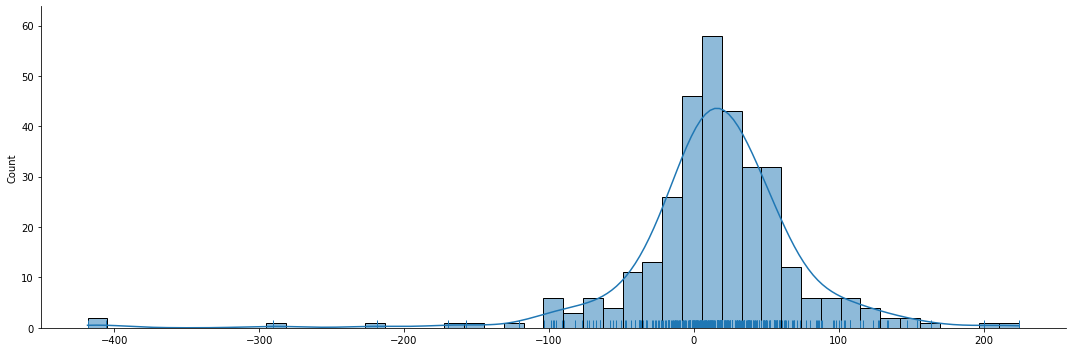

In [12]:
sns.displot(gaps, kde=True, rug=True, aspect=3)
plt.show()

In [13]:
gap_mean = np.mean(gaps)
gap_var = np.var(gaps)
gap_std = np.std(gaps)
gap_mean, gap_var, gap_std

(13.77945121951225, 3921.6481204305423, 62.62306380584187)

In [14]:
sigma1up = gap_mean + (gap_std * 1) 
sigma2up = gap_mean + (gap_std * 2)
sigma3up = gap_mean + (gap_std * 3)

sigma1down = gap_mean - (gap_std * 1) 
sigma2down = gap_mean - (gap_std * 2)
sigma3down = gap_mean - (gap_std * 3)

sigma1up, sigma1down, sigma2up, sigma2down, sigma3up, sigma3down

(76.40251502535412,
 -48.84361258632963,
 139.025578831196,
 -111.4666763921715,
 201.64864263703788,
 -174.08974019801337)

In [15]:
# Separating the dataframe into each year
combined = df[pd.to_datetime(df.Date).isin(expiries.expDays)]
Y2015 = combined[combined.Date.str.contains('2015')]
Y2016 = combined[combined.Date.str.contains('2016')]
Y2017 = combined[combined.Date.str.contains('2017')]
Y2018 = combined[combined.Date.str.contains('2018')]
Y2019 = combined[combined.Date.str.contains('2019')]
Y2020 = combined[combined.Date.str.contains('2020')]
Y2021 = combined[combined.Date.str.contains('2021')]

In [16]:
# Finding gaps in each year
yearlyGaps = [df.loc[Y2015.index, 'Open'].values - df.loc[Y2015.index - 1, 'Close'].values,
                df.loc[Y2016.index, 'Open'].values - df.loc[Y2016.index - 1, 'Close'].values,
                df.loc[Y2017.index, 'Open'].values - df.loc[Y2017.index - 1, 'Close'].values,
                df.loc[Y2018.index, 'Open'].values - df.loc[Y2018.index - 1, 'Close'].values,
                df.loc[Y2019.index, 'Open'].values - df.loc[Y2019.index - 1, 'Close'].values,
                df.loc[Y2020.index, 'Open'].values - df.loc[Y2020.index - 1, 'Close'].values,
                df.loc[Y2021.index, 'Open'].values - df.loc[Y2021.index - 1, 'Close'].values]

In [17]:
# Number of expiries in each year
yearlyExpiries = [len(sublist) for sublist in yearlyGaps]

In [18]:
yearlyExpDF = pd.DataFrame(np.repeat([2015, 2016, 2017, 2018, 2019, 2020, 2021], yearlyExpiries),
                             [item for sublist in yearlyGaps for item in sublist]).reset_index()
yearlyExpDF.columns = ['gaps', 'year']
yearlyExpDF.head()

,gaps,year
0,146.96,2015
1,16.35,2015
2,-12.79,2015
3,9.40,2015
4,49.55,2015


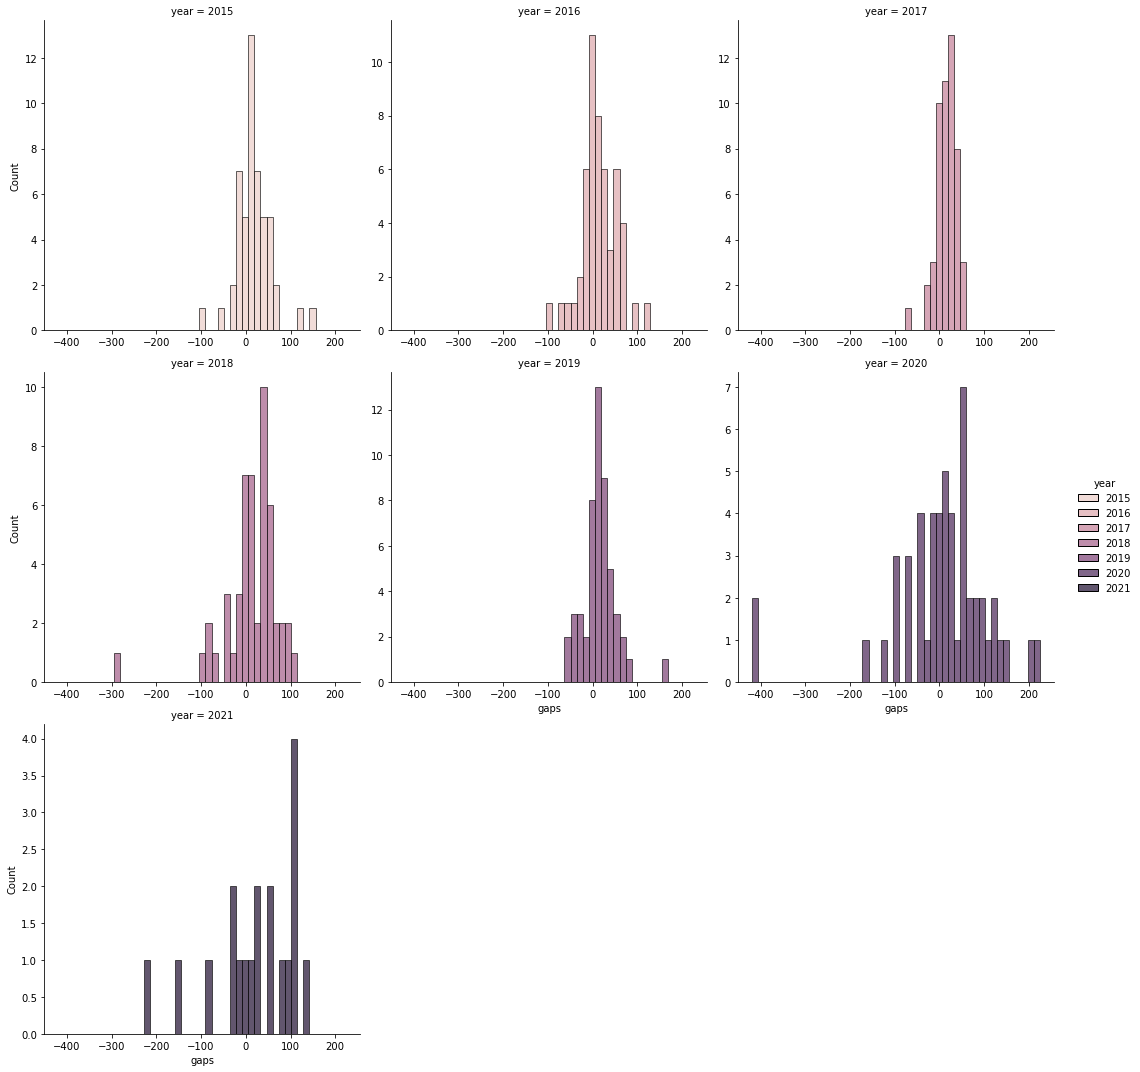

In [19]:
sns.displot(yearlyExpDF, x="gaps", hue="year", col="year", col_wrap=3,
           facet_kws={"sharex":False, "sharey":False})